In [1]:
import pandas as pd
from src.config import get_interim_dir
import seaborn as sns

all_data = {}
for t in ["T1", "T2", "T3"]:
    all_data[t] = pd.read_pickle(get_interim_dir() + "agg_pca_analysis_{}.pkl".format(t))

In [2]:
all_data[t].keys()

dict_keys(['X', 'scaler', 'pca_out', 'ecod_out', 'iforest_out', 'mcd_out', 'mahal_out'])

In [3]:
all_data[t]["mahal_out"]

,mahal_dist,p,rejected,p_corrected
Gene,,,,
0610009B22Rik,35.599488,1.000000,False,1.000000
0610010K14Rik,27.163374,1.000000,False,1.000000
0610030E20Rik,70.057977,0.894044,False,1.000000
0610040J01Rik,60.022799,0.985097,False,1.000000
1110004F10Rik,130.932140,0.001295,True,0.009783
...,...,...,...,...
Zzef1,53.803037,0.997446,False,1.000000
Zzz3,42.831906,0.999974,False,1.000000
a,56.177890,0.994690,False,1.000000


In [4]:
all_data[t]["mahal_out"]["rejected"].sum()

2731

In [5]:
all_mcd = {}
for t in ["T1", "T2", "T3"]:
    all_mcd[t] = pd.Series(all_data[t]["mcd_out"].decision_scores_, index=all_data[t]["X"].index)
all_mcd[t]

Gene
0610009B22Rik     51.997900
0610010K14Rik     45.089336
0610030E20Rik    115.974943
0610040J01Rik     88.160704
1110004F10Rik    200.948920
                    ...    
Zzef1             81.933539
Zzz3              65.636226
a                 85.244733
ccdc198           60.509314
mei-04           110.151749
Length: 17884, dtype: float64

In [6]:
all_if = {}
for t in ["T1", "T2", "T3"]:
    all_if[t] = pd.Series(all_data[t]["iforest_out"].decision_scores_, index=all_data[t]["X"].index)
all_if[t]

Gene
0610009B22Rik   -0.047103
0610010K14Rik   -0.046887
0610030E20Rik   -0.019122
0610040J01Rik   -0.025033
1110004F10Rik    0.017991
                   ...   
Zzef1           -0.019604
Zzz3            -0.022730
a               -0.027441
ccdc198         -0.041830
mei-04          -0.021897
Length: 17884, dtype: float64

In [7]:
all_ecod = {}
for t in ["T1", "T2", "T3"]:
    all_ecod[t] = pd.Series(all_data[t]["ecod_out"].decision_scores_, index=all_data[t]["X"].index)
all_ecod[t]

Gene
0610009B22Rik    106.819192
0610010K14Rik    101.248126
0610030E20Rik    131.949724
0610040J01Rik    120.848672
1110004F10Rik    148.702392
                    ...    
Zzef1            121.092787
Zzz3             115.962996
a                120.355578
ccdc198          114.171368
mei-04           127.780830
Length: 17884, dtype: float64

In [8]:
all_mcd["T1"].sort_values(ascending=False)[-1]

24.393027505501113

In [9]:
all_mcd["T3"].sort_values(ascending=False).index.get_loc("Coa6")

9678

In [10]:
all_mcd["T2"].sort_values(ascending=False).head()

Gene
Anapc10    1.789196e+06
Zbtb43     4.132219e+05
Dnajb9     3.927360e+05
Sox12      3.371766e+05
Vmn2r97    3.066183e+05
dtype: float64

In [11]:
all_mcd["T3"].sort_values(ascending=False).head()

Gene
Tcp11x2    4.624812e+06
Mrpl16     2.528447e+06
Vmn1r77    1.151658e+06
Sfswap     1.078893e+06
Scgb2b3    8.760806e+05
dtype: float64

In [61]:
scores = pd.DataFrame({
    "T1": all_mcd["T1"],
    "T2": all_mcd["T2"],
    "T3": all_mcd["T3"],
})
scores.dropna().rank(ascending=False).sum(axis=1).sort_values(ascending=True).head(20)


Gene
Gzmg         988.0
Vmn1r77     1369.0
Esp16       1452.0
Nubp1       1478.0
Vmn2r97     1547.0
Vmn1r236    1640.0
Fkbp1b      1646.0
Caap1       1651.0
Zfp780b     1672.0
Tcp10c      1724.0
Zfp595      1725.0
Rsl1d1      1742.0
Polq        1746.0
Ruvbl2      1755.0
Elovl6      1760.0
Nup205      1762.0
Paip1       1768.0
Aurkc       1769.0
Trappc6b    1785.0
Ttc33       1805.0
dtype: float64

In [13]:
import numpy as np
mcd_outliers = {}
for t in ["T1", "T2", "T3"]:
    mcd_outliers[t] = all_mcd[t].sort_values(ascending=False).head(5000)


import itertools
from sklearn.metrics import jaccard_score
for each in itertools.combinations(["T1", "T2", "T3"], 2):
    i = np.intersect1d(mcd_outliers[each[0]].index.to_list(), mcd_outliers[each[1]].index.to_list()).shape[0]
    u = np.union1d(mcd_outliers[each[0]].index.to_list(), mcd_outliers[each[1]].index.to_list()).shape[0]

    print(each, i/u)



('T1', 'T2') 0.43000143000143
('T1', 'T3') 0.4316392269148175
('T2', 'T3') 0.45053669857847406


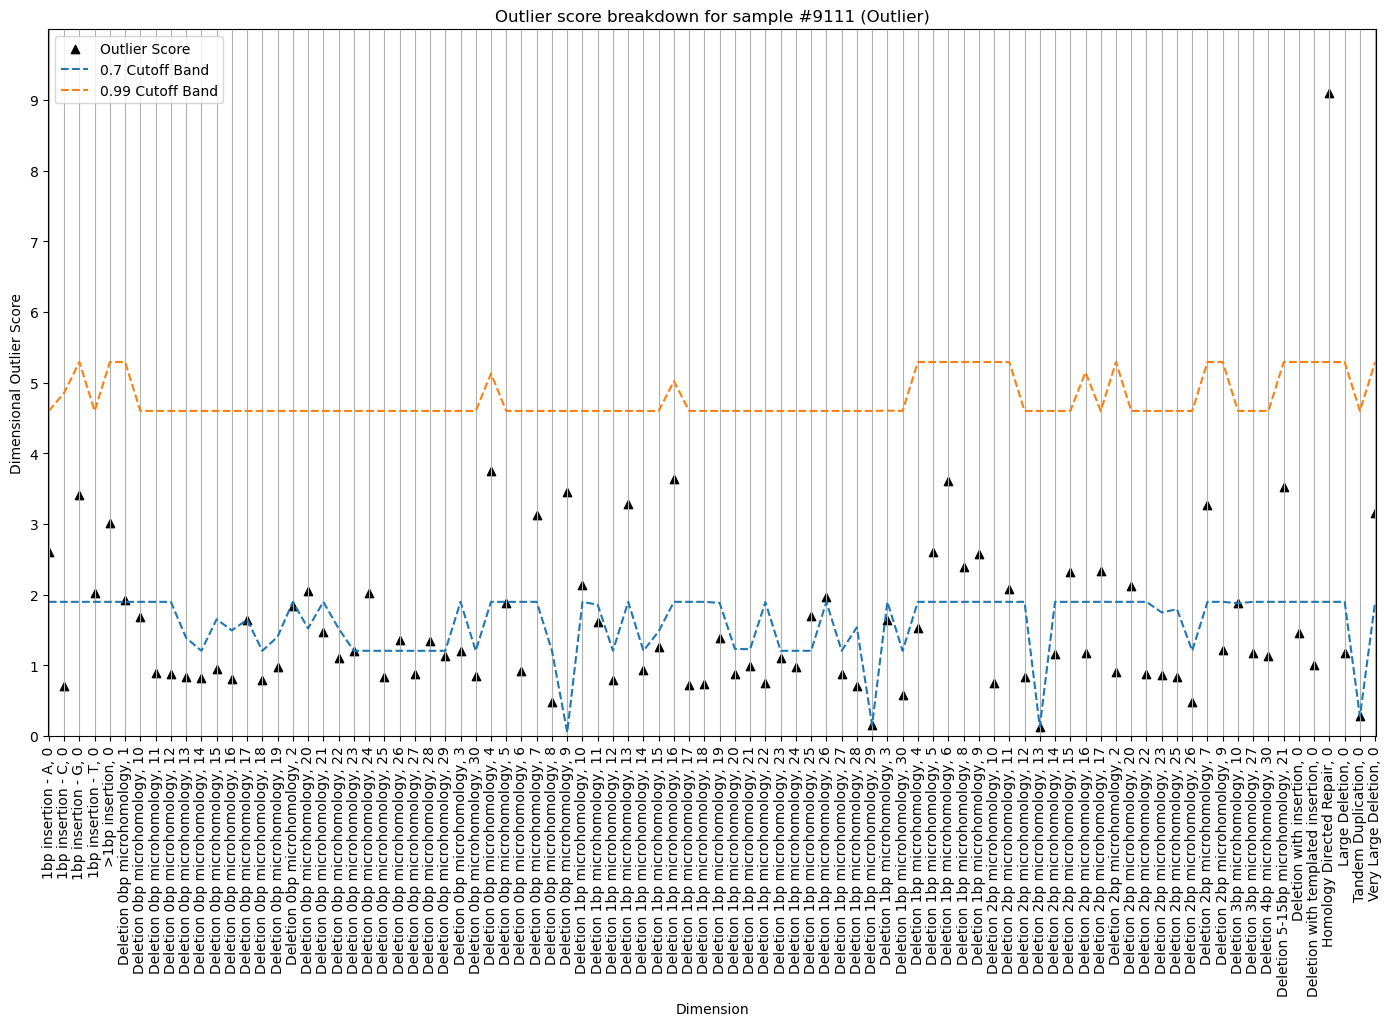

In [67]:
from src.visualization.ecod import explain_outlier
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
explain_outlier(all_data["T3"]["ecod_out"], all_data["T3"]["X"].index.get_loc("Mettl14"), feature_names=all_data["T3"]["X"].columns.to_list())

<AxesSubplot:xlabel='Frequency', ylabel='Feature'>

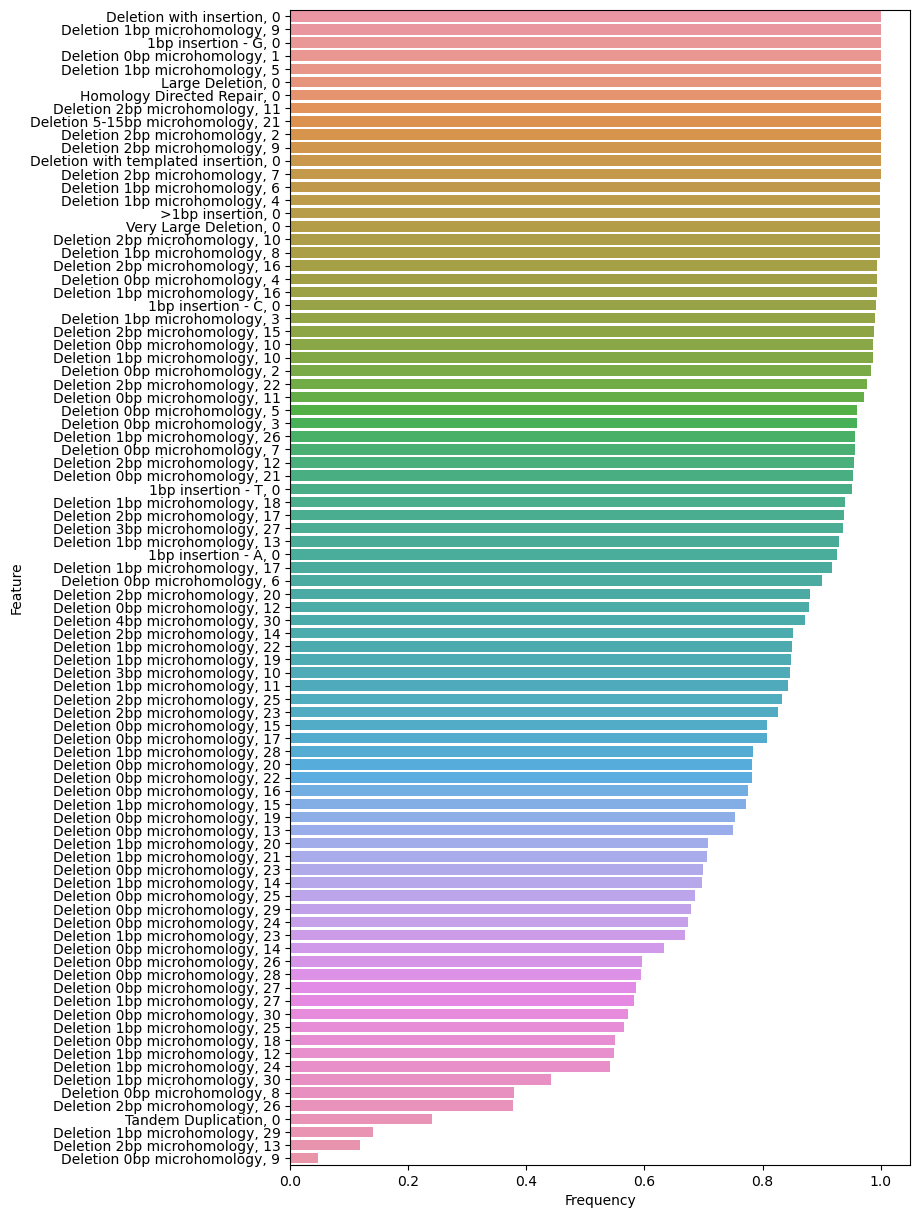

In [15]:
barplot_target = "T3"
barplot_d = ((all_data[barplot_target]["X"] > 0).sum() / all_data[barplot_target]["X"].shape[0]).sort_values(ascending=False).to_frame(name="Frequency").reset_index()
plt.figure(figsize=(8,15))
sns.barplot(data=barplot_d, x="Frequency", y="Feature")

In [16]:
all_guides = {}
for t in ["T1", "T2", "T3"]:
    all_guides[t] = all_data[t]["mahal_out"].reset_index()
    all_guides[t]["Target"] = t
    all_guides[t] = all_guides[t].set_index(["Target", "Gene"])
all_guides = pd.concat(all_guides.values())
all_guides.head()

mahal_dist         p  rejected  p_corrected
Target Gene                                                      
T1     0610009B22Rik   34.146439  1.000000     False          1.0
       0610010K14Rik   24.831875  1.000000     False          1.0
       0610030E20Rik   81.347058  0.621833     False          1.0
       0610040J01Rik   78.470581  0.705587     False          1.0
       1110004F10Rik   74.192842  0.814251     False          1.0

In [17]:
outlier_genes = all_guides[all_guides["rejected"]]
outlier_genes = outlier_genes.groupby("Gene").size().sort_values()
sizes = all_guides.groupby("Gene").size().sort_values()
num_targets = all_guides[all_guides["rejected"]].groupby(["Gene", "Target"]).size().groupby("Gene").size().to_frame("num_targets")
outlier_genes = outlier_genes.to_frame(name="num_outliers").join(sizes.to_frame(name="num_guides"), how='inner')
outlier_genes = outlier_genes.join(num_targets)
outlier_genes["fraction"] = outlier_genes["num_outliers"]/outlier_genes["num_guides"]
outlier_genes

,num_outliers,num_guides,num_targets,fraction
Gene,,,,
1110004F10Rik,1,3,1,0.333333
Naip5,1,3,1,0.333333
Nanos2,1,3,1,0.333333
Nap1l3,1,3,1,0.333333
Naprt,1,3,1,0.333333
...,...,...,...,...
Sgo2b,3,3,3,1.000000
Sgo2a,3,3,3,1.000000
Mdh1,3,3,3,1.000000


/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_outliers', ylabel='count'>

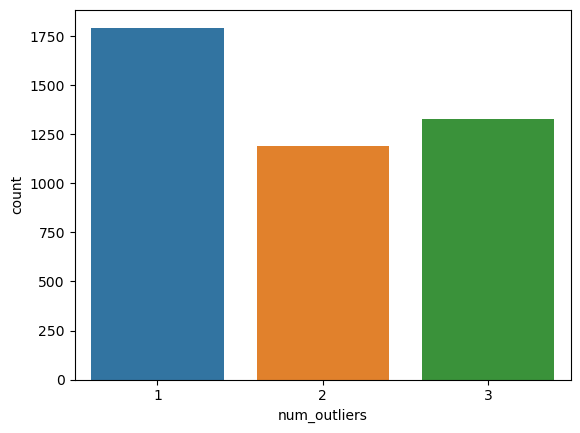

In [18]:
import seaborn as sns

sns.countplot(outlier_genes["num_outliers"])

In [19]:
from src.config import get_common_barcodes

filtered_barcodes = pd.read_csv(get_common_barcodes(), sep="\t")
filtered_barcodes.head()

,Target,Alias,Gene,Barcode,Filtered,Counts,Corr_Within,Corr_Between,log10Count
0,T1,MB01,0610009B22Rik,0610009B22Rik-1,0,2247.0,0.952007,0.910326,3.351603
1,T1,MB01,0610009B22Rik,0610009B22Rik-2,0,2792.0,0.962390,0.939419,3.445915
2,T1,MB01,0610009B22Rik,0610009B22Rik-3,0,3907.0,0.966884,0.952470,3.591843
3,T1,MB01,0610009B22Rik,0610009B22Rik-4,0,3757.0,0.968739,0.955281,3.574841
4,T1,MB01,0610009B22Rik,0610009B22Rik-5,0,2549.0,0.965979,0.959352,3.406370


In [48]:
gRNA_counts = filtered_barcodes.groupby(["Target", "Gene"]).size()
gRNA_counts = gRNA_counts.to_frame(name="num_guides").join(filtered_barcodes[filtered_barcodes.Filtered.isin([1,2,3,4])].groupby(["Target", "Gene"]).size().to_frame(name="num_bad_guides")).fillna(0)
gRNA_counts["good_guides"] = gRNA_counts["num_guides"] - gRNA_counts["num_bad_guides"]
gRNA_counts

num_guides  num_bad_guides  good_guides
Target Gene                                                  
T1     0610009B22Rik          10             0.0         10.0
       0610010K14Rik          18             2.0         16.0
       0610030E20Rik          10             3.0          7.0
       0610040J01Rik          10             3.0          7.0
       1110004F10Rik          10             4.0          6.0
...                          ...             ...          ...
T3     Zzef1                  10             0.0         10.0
       Zzz3                   10             0.0         10.0
       a                      10             4.0          6.0
       ccdc198                10             0.0         10.0
       mei-04                 10             4.0          6.0

[55218 rows x 3 columns]

<AxesSubplot:xlabel='good_guides', ylabel='ECOD_Score'>

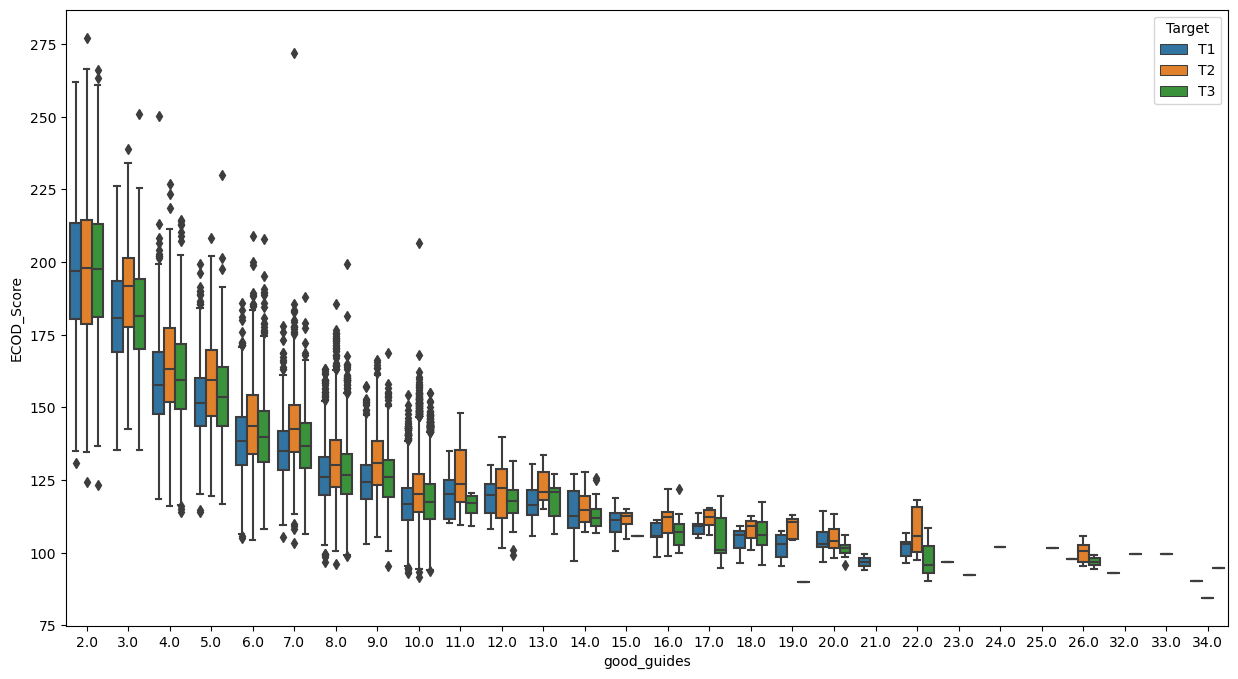

In [68]:
plt.figure(figsize=(15,8))
scatter_d = pd.concat([pd.concat([all_ecod[t].to_frame(name="ECOD_Score")], keys=[t], names=["Target"]) for t in ["T1", "T2", "T3"]], axis=0).join(gRNA_counts[["good_guides"]]).reset_index()
scatter_d["logcounts"] = np.log10(scatter_d["good_guides"])
sns.boxplot(data=scatter_d, x="good_guides", y="ECOD_Score", hue="Target")

In [21]:
filtered_barcodes[filtered_barcodes.Gene == "Map1b"]

,Target,Alias,Gene,Barcode,Filtered,Counts,Corr_Within,Corr_Between,log10Count
43872,T1,MB01,Map1b,Map1b-1,0,2517.0,0.962743,0.949400,3.400883
43873,T1,MB01,Map1b,Map1b-2,0,9094.0,0.975889,0.975685,3.958755
43874,T1,MB01,Map1b,Map1b-3,0,4989.0,0.974643,0.969566,3.698014
43875,T1,MB01,Map1b,Map1b-4,0,3488.0,0.963832,0.953029,3.542576
43876,T1,MB01,Map1b,Map1b-5,0,4556.0,0.961501,0.973150,3.658584
133282,T1,MB02,Map1b,Map1b-1,0,2939.0,0.967172,0.958179,3.468200
133283,T1,MB02,Map1b,Map1b-2,0,10683.0,0.975859,0.978207,4.028693
133284,T1,MB02,Map1b,Map1b-3,0,5580.0,0.964558,0.967472,3.746634
133285,T1,MB02,Map1b,Map1b-4,0,3858.0,0.974602,0.967568,3.586362
133286,T1,MB02,Map1b,Map1b-5,0,4593.0,0.970172,0.969566,3.662096


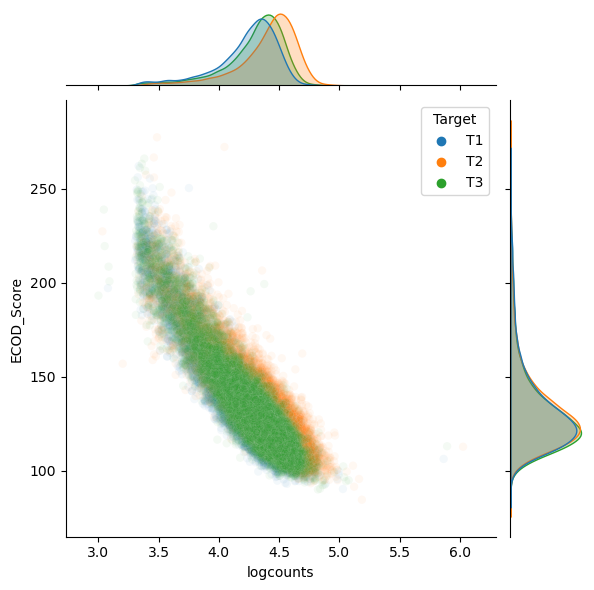

In [22]:
scatter_d = pd.concat([pd.concat([all_ecod[t].to_frame(name="ECOD_Score")], keys=[t], names=["Target"]) for t in ["T1", "T2", "T3"]], axis=0).join(filtered_barcodes[filtered_barcodes["Filtered"] == 0].groupby(["Target", "Gene"]).sum()[["Counts"]]).reset_index()
scatter_d["logcounts"] = np.log10(scatter_d["Counts"])

sns.jointplot(data=scatter_d, x="logcounts", y="ECOD_Score", alpha=0.05, hue="Target")

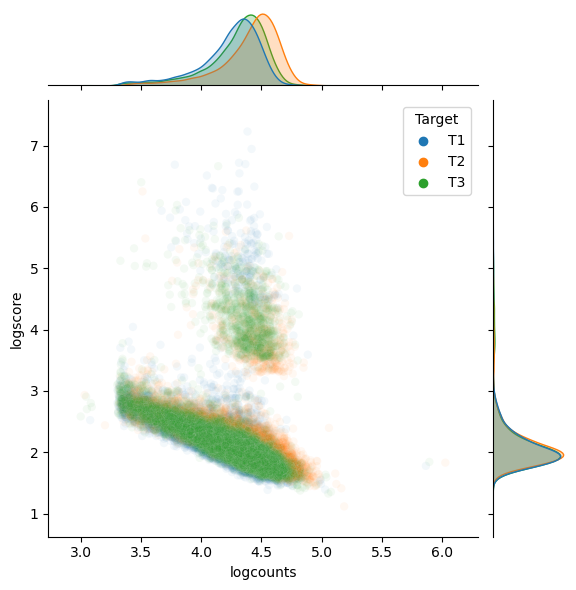

In [23]:
scatter_d = pd.concat([pd.concat([all_mcd[t].to_frame(name="MCD_Score")], keys=[t], names=["Target"]) for t in ["T1", "T2", "T3"]], axis=0).join(filtered_barcodes[filtered_barcodes["Filtered"] == 0].groupby(["Target", "Gene"]).sum()[["Counts"]]).reset_index()
scatter_d["logcounts"] = np.log10(scatter_d["Counts"])

scatter_d["logscore"] = np.log10(scatter_d["MCD_Score"])
scatter_d
sns.jointplot(data=scatter_d, x="logcounts", y="logscore", alpha=0.05, hue="Target")

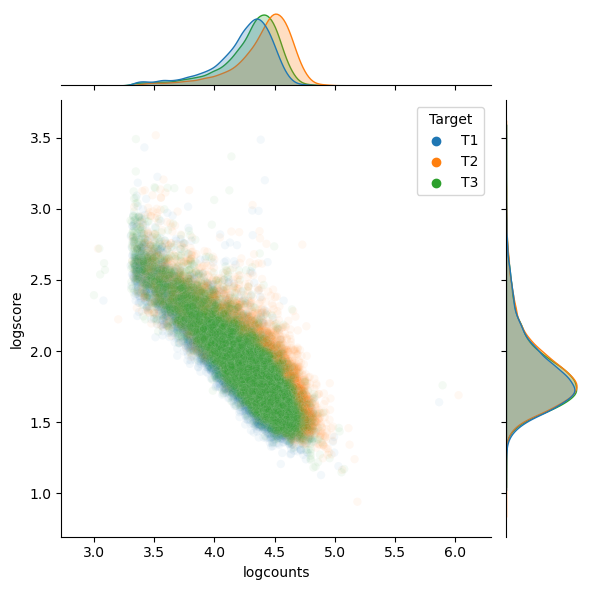

In [24]:
scatter_d = pd.concat([pd.concat([all_guides.loc[t, ["mahal_dist"]]], keys=[t], names=["Target"]) for t in ["T1", "T2", "T3"]], axis=0).join(filtered_barcodes[filtered_barcodes["Filtered"] == 0].groupby(["Target", "Gene"]).sum()[["Counts"]]).reset_index()
scatter_d["logcounts"] = np.log10(scatter_d["Counts"])
scatter_d["logscore"] = np.log10(scatter_d["mahal_dist"])
scatter_d
sns.jointplot(data=scatter_d, x="logcounts", y="logscore", alpha=0.05, hue="Target")

/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


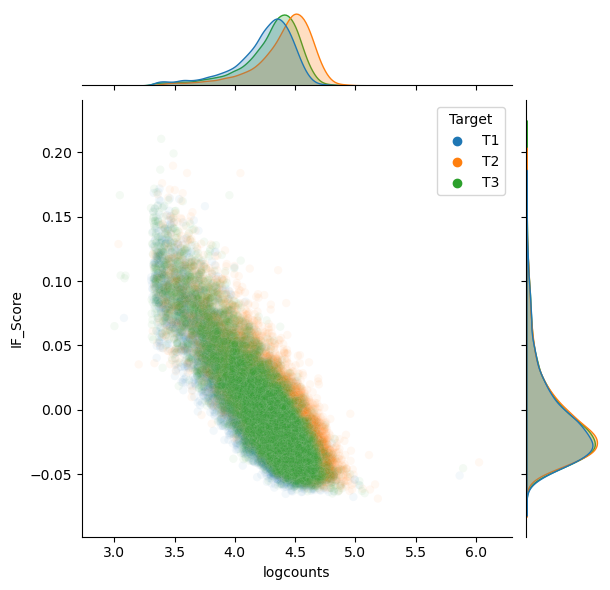

In [25]:
scatter_d = pd.concat([pd.concat([all_if[t].to_frame(name="IF_Score")], keys=[t], names=["Target"]) for t in ["T1", "T2", "T3"]], axis=0).join(filtered_barcodes[filtered_barcodes["Filtered"] == 0].groupby(["Target", "Gene"]).sum()[["Counts"]]).reset_index()
scatter_d["logcounts"] = np.log10(scatter_d["Counts"])
scatter_d["logscore"] = np.log10(scatter_d["IF_Score"])
scatter_d
sns.jointplot(data=scatter_d, x="logcounts", y="IF_Score", alpha=0.05, hue="Target")

In [26]:
from src.config import HOME_PATH
from src.config import get_hussmann_supplementary_xlsx


genesubset2 = pd.read_csv(HOME_PATH + "/repos/MUSICian/src/data/GeneSubset2.txt", sep="\t")["Gene"]
genesubsetSD30 = pd.read_csv(HOME_PATH + "/repos/MUSICian/src/data/GeneSubsetSD30.txt", sep="\t")["Gene"]
hussmann_repair_genes = pd.read_excel(get_hussmann_supplementary_xlsx(4), sheet_name="Table S4", skiprows=1)["Gene"].str.lower()


In [27]:
genesubset2

0          Dut
1      Faap100
2        Fanca
3        Fancb
4        Fancc
5       Fancd2
6        Fancg
7        Fanci
8        Fancm
9        H2afx
10        Helq
11       Rad51
12    Rad51ap1
13       Rad54
14      Rnf168
15        Rnf8
16       Rbbp8
17       Ube2t
18        Poll
19        Polm
20        Polq
21        Lig4
22       Xrcc4
23       Xrcc5
24       Xrcc6
25       H2afx
26      Mre11a
27       Rad50
28         Nbn
29    Trp53bp1
30        Rif1
31      Paxip1
32       Prkdc
33      Mad2l2
34        Ctc1
35        Stn1
36        Ten1
37       Shld2
38       Brca1
39       Brca2
40       Bard1
41       Rad52
42       Trp53
43        Dbr1
44      Mettl3
45     Mettl14
46       Fancl
47        Hus1
48       Rad17
49       Tonsl
50       Wdr48
51        Usp1
Name: Gene, dtype: object

In [28]:
print(genesubset2.shape)
print(genesubset2.isin(outlier_genes[outlier_genes["num_targets"] > 0].index.to_list()).sum())
missing_genes = genesubset2[~genesubset2.isin(outlier_genes[outlier_genes["num_targets"] > 0].index.to_list())]
missing_genes

(52,)
35


2        Fanca
9        H2afx
12    Rad51ap1
13       Rad54
25       H2afx
29    Trp53bp1
31      Paxip1
32       Prkdc
33      Mad2l2
34        Ctc1
35        Stn1
37       Shld2
42       Trp53
44      Mettl3
45     Mettl14
49       Tonsl
50       Wdr48
Name: Gene, dtype: object

In [29]:
print(genesubsetSD30.shape)
genesubsetSD30.isin(outlier_genes[outlier_genes["num_targets"] > 0].index.to_list()).sum()

(628,)


442

In [30]:
print(hussmann_repair_genes.shape)
hussmann_repair_genes.isin(outlier_genes[outlier_genes["num_targets"] > 0].index.str.lower().to_list()).sum()

(476,)


208

In [31]:
filtered_barcodes = pd.read_csv(get_common_barcodes(), sep="\t")
kept_indexes = pd.MultiIndex.from_frame(filtered_barcodes[filtered_barcodes["Filtered"] == 0][["Target", "Alias", "Gene", "Barcode"]])

X = {}
for t in ["T1", "T2", "T3"]:
    X[t] = all_data[t]["X"].reset_index()
    X[t]["Target"] = t
    X[t] = X[t].set_index(["Target", "Gene"])
X = pd.concat(X.values())

X.shape

(53436, 104)

['Rab11fip3', 'Trpm5', 'Itih1', 'Gba', 'Ms4a7', 'Prkdc', 'Mettl14', 'Gzmg', 'Polq', 'Esp16']


/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


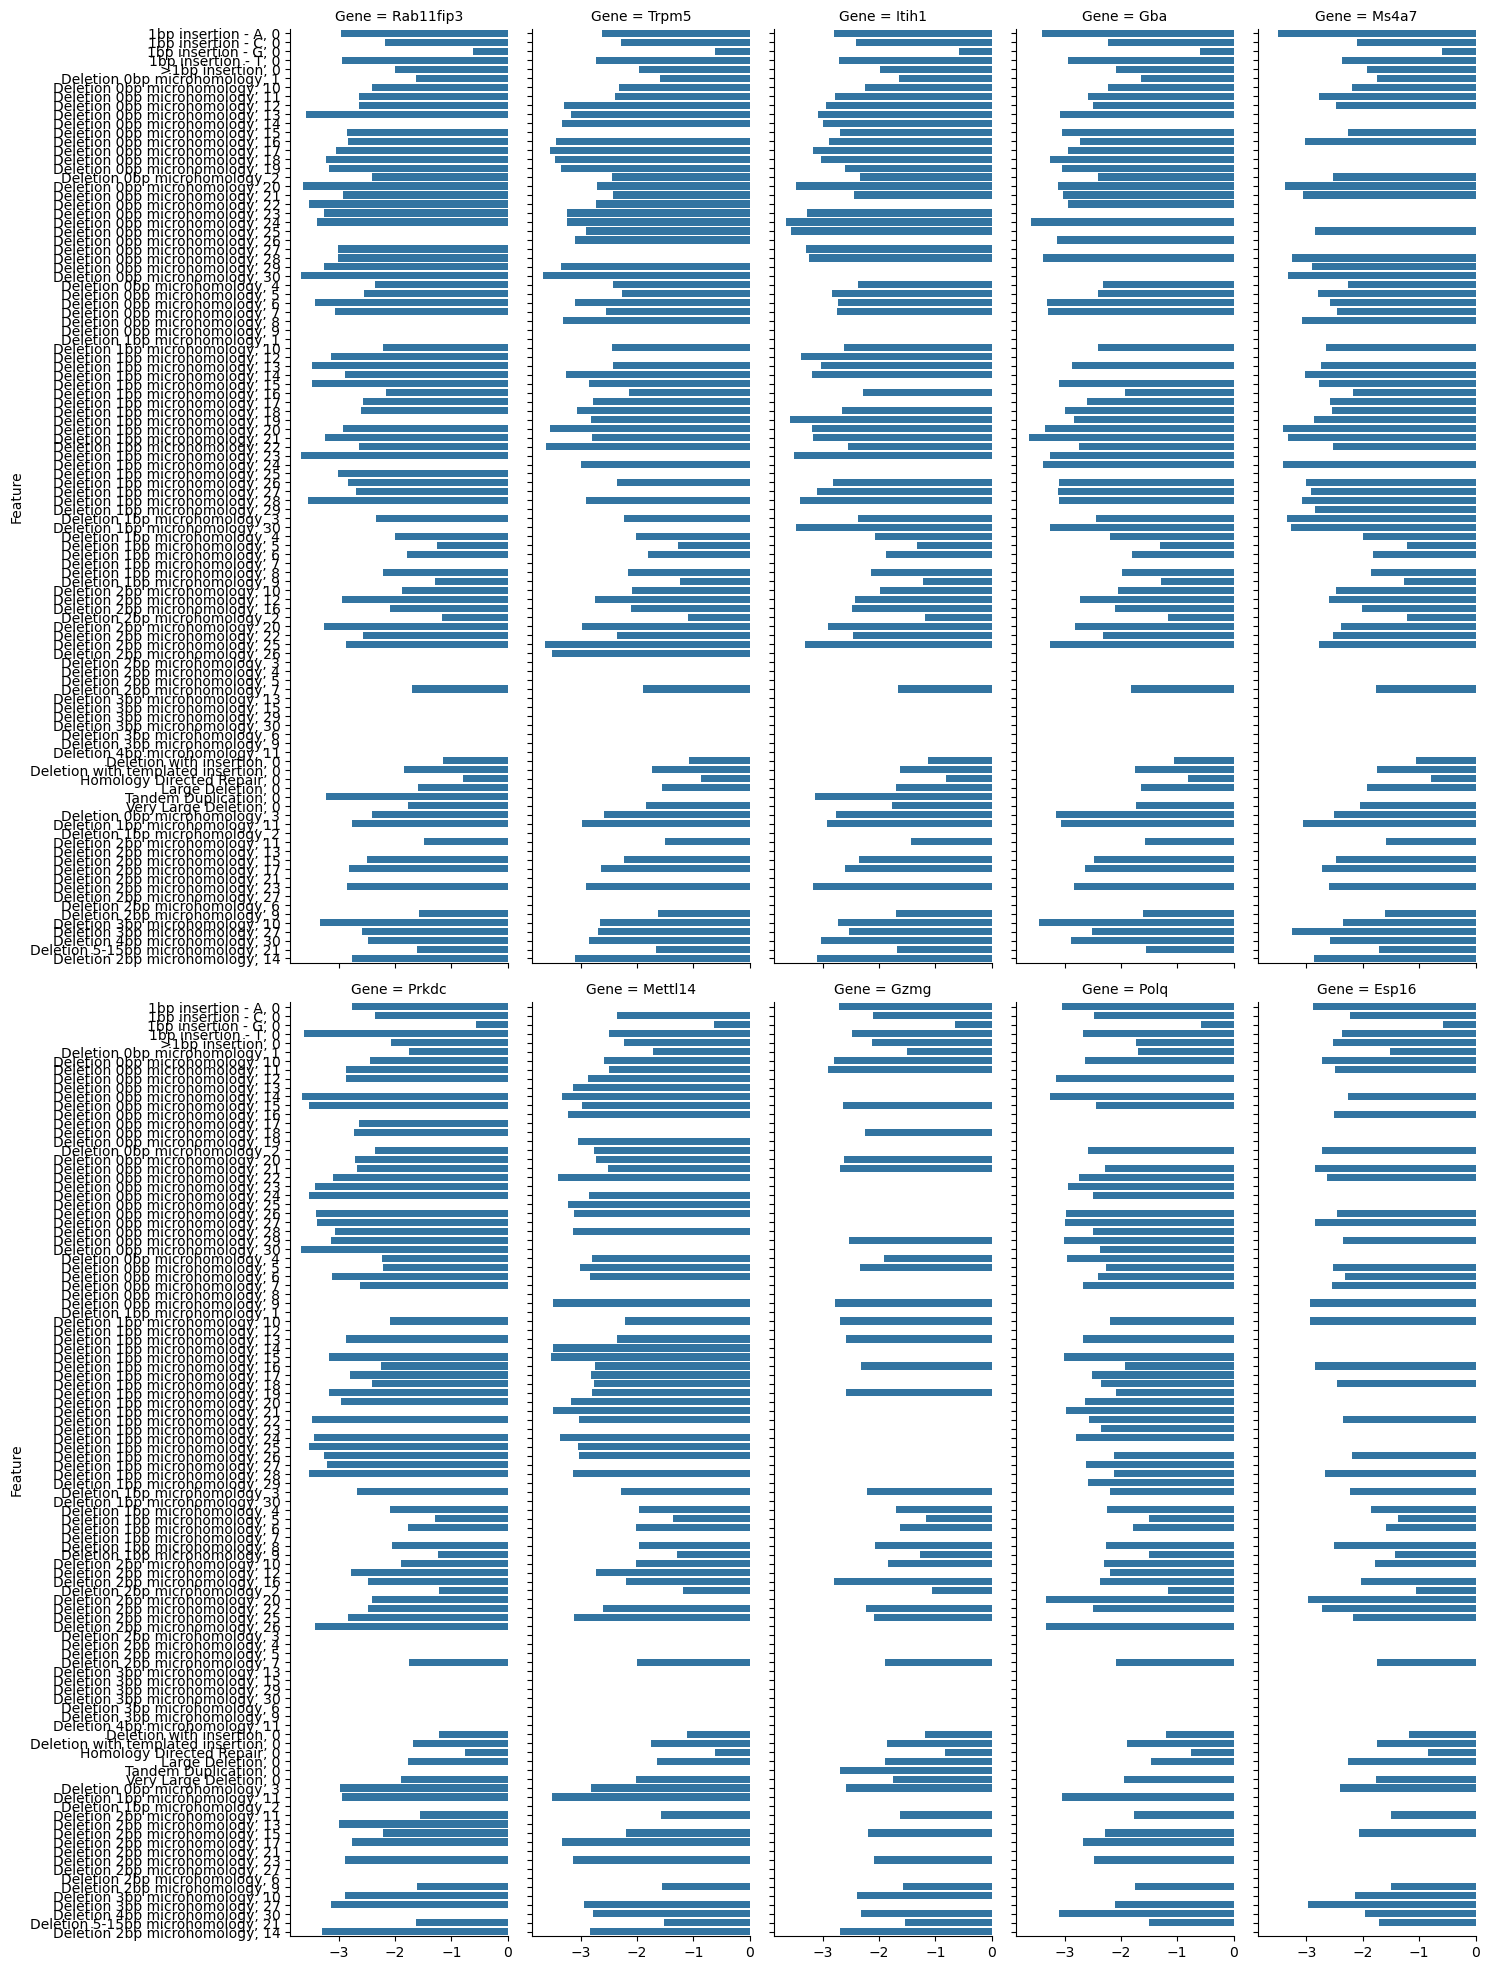

In [66]:
import matplotlib.pyplot as plt
examples = X.xs("T3", level="Target").index.to_series().sample(5)
examples = examples.to_list() + ["Prkdc", "Mettl14", "Gzmg", "Polq", "Esp16"]
ax = X.xs("T3", level="Target").loc[examples].fillna(0)
print(examples)

ax = ax.reset_index().melt(id_vars="Gene")
ax["logvalue"] = np.log10(ax["value"])
g = sns.FacetGrid(data=ax, col="Gene", height=10, aspect=.3, col_wrap=5)
g.map_dataframe(sns.barplot, y="Feature", x="logvalue")
g.set(xlabel=None)


In [33]:
X.xs("T1", level="Target").loc[examples].fillna(0).T.corr()

Gene,Kprp,Tac2,Otos,Mterf2,Pcid2,Prkdc,Mettl14,Ipo9,Arpc3,Vmn1r222
Gene,,,,,,,,,,
Kprp,1.000000,0.979564,0.993024,0.969763,0.978876,0.987179,0.981430,0.981342,0.982521,0.972292
Tac2,0.979564,1.000000,0.979983,0.979037,0.980233,0.953007,0.931675,0.981379,0.975950,0.954560
Otos,0.993024,0.979983,1.000000,0.973468,0.984437,0.977143,0.971016,0.984764,0.988040,0.979385
Mterf2,0.969763,0.979037,0.973468,1.000000,0.975180,0.956455,0.927328,0.989435,0.974068,0.943696
Pcid2,0.978876,0.980233,0.984437,0.975180,1.000000,0.951888,0.941648,0.979712,0.980038,0.967317
Prkdc,0.987179,0.953007,0.977143,0.956455,0.951888,1.000000,0.988573,0.965935,0.970092,0.962129
Mettl14,0.981430,0.931675,0.971016,0.927328,0.941648,0.988573,1.000000,0.951640,0.952860,0.957154
Ipo9,0.981342,0.981379,0.984764,0.989435,0.979712,0.965935,0.951640,1.000000,0.978527,0.961154
Arpc3,0.982521,0.975950,0.988040,0.974068,0.980038,0.970092,0.952860,0.978527,1.000000,0.978822


/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/var/folders/5x/n2td64g918lgvdh3qm2x3bhc0000gn/T/ipykernel_76254/3124935560.py:19: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  ttest_ind(sample_hdr_events.loc[~sample_hdr_events.gene_of_interest, "freq"].values, sample_hdr_events.loc[sample_hdr_events.gene_of_interest, "freq"].values)
/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1250: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1250: RuntimeWarning: invalid value 

Ttest_indResult(statistic=nan, pvalue=nan)

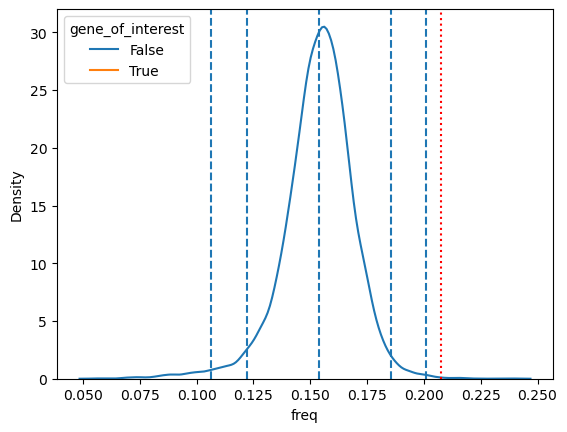

In [34]:
gene_of_interest = "Trp53"
sample_hdr_events = X.xs("T3", level="Target")["Homology Directed Repair, 0"].to_frame("freq")
sample_hdr_events["gene_of_interest"] = sample_hdr_events.index.get_level_values("Gene") == gene_of_interest

sns.kdeplot(data = sample_hdr_events, x="freq", hue="gene_of_interest", common_norm=False)


plt.axvline(sample_hdr_events["freq"].mean(), ls="--")
plt.axvline(sample_hdr_events["freq"].mean() + 2* sample_hdr_events["freq"].std(), ls="--")
plt.axvline(sample_hdr_events["freq"].mean() + 3* sample_hdr_events["freq"].std(), ls="--")
plt.axvline(sample_hdr_events["freq"].mean() - 2* sample_hdr_events["freq"].std(), ls="--")
plt.axvline(sample_hdr_events["freq"].mean() - 3* sample_hdr_events["freq"].std(), ls="--")

for v in sample_hdr_events.loc[sample_hdr_events.gene_of_interest, "freq"].values:
    plt.axvline(v, color="r", ls=":")

from scipy.stats import ttest_ind

ttest_ind(sample_hdr_events.loc[~sample_hdr_events.gene_of_interest, "freq"].values, sample_hdr_events.loc[sample_hdr_events.gene_of_interest, "freq"].values)